# Import libraries

In [165]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# custom libs
from mlrefined_libraries import unsupervised_library as unsuplib
from mlrefined_libraries import basics_library as baslib
datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'

from PIL import Image

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in data

In [139]:
# load in dataset
#data = np.loadtxt('image_patches.csv', delimiter = ',')

# divy up data into images and labels
#patches = data.T

In [285]:
p1 = '../../mlrefined_images/convnet_images/dudes.png'
p2 = '../../mlrefined_images/convnet_images/dog.jpg'
p3 = '../../mlrefined_images/convnet_images/flyer.jpg'
p4 = '../../mlrefined_images/convnet_images/pandas.jpeg'
p5 = '../../mlrefined_images/convnet_images/nurg.jpg'

img_list = [p1, p2, p3, p4, p5]
number = 100000
patch_size = 16

def extract_patches(img_list, number, patch_size):
    
    patches = []
    k = number/len(img_list)
    for path in img_list:
        image = np.array(Image.open(path).convert('L'))
        counter = 0
        while counter<k:
            i = np.random.randint(np.shape(image)[0]-patch_size)
            j = np.random.randint(np.shape(image)[1]-patch_size)
            window = image[i:i+patch_size, j:j+patch_size]
            if np.std(window) > .01:
                patches.append(np.reshape(window,(patch_size**2)))
                counter = counter + 1
            
    return np.array(patches).T
              
patches = extract_patches(img_list, number, patch_size)    

In [286]:
np.shape(patches)

(256, 100000)

# Plot data

In [310]:
def show_images(X):
    '''
    Function for plotting input images, stacked in columns of input X.
    '''
    # plotting mechanism taken from excellent answer from stack overflow: https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib
    plt.figure(figsize = (6,6))
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.05, hspace=0.05) # set the spacing between axes. 
    
    # shape of square version of image
    square_shape = int((X.shape[0])**(0.5))

    for i in range(min(100,X.shape[1])):
        # plot image in panel
        ax = plt.subplot(gs1[i])
        im = ax.imshow(np.reshape(X[:,i],(square_shape,square_shape)),cmap = 'gray')

        # clean up panel
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    plt.show()

<IPython.core.display.Javascript object>


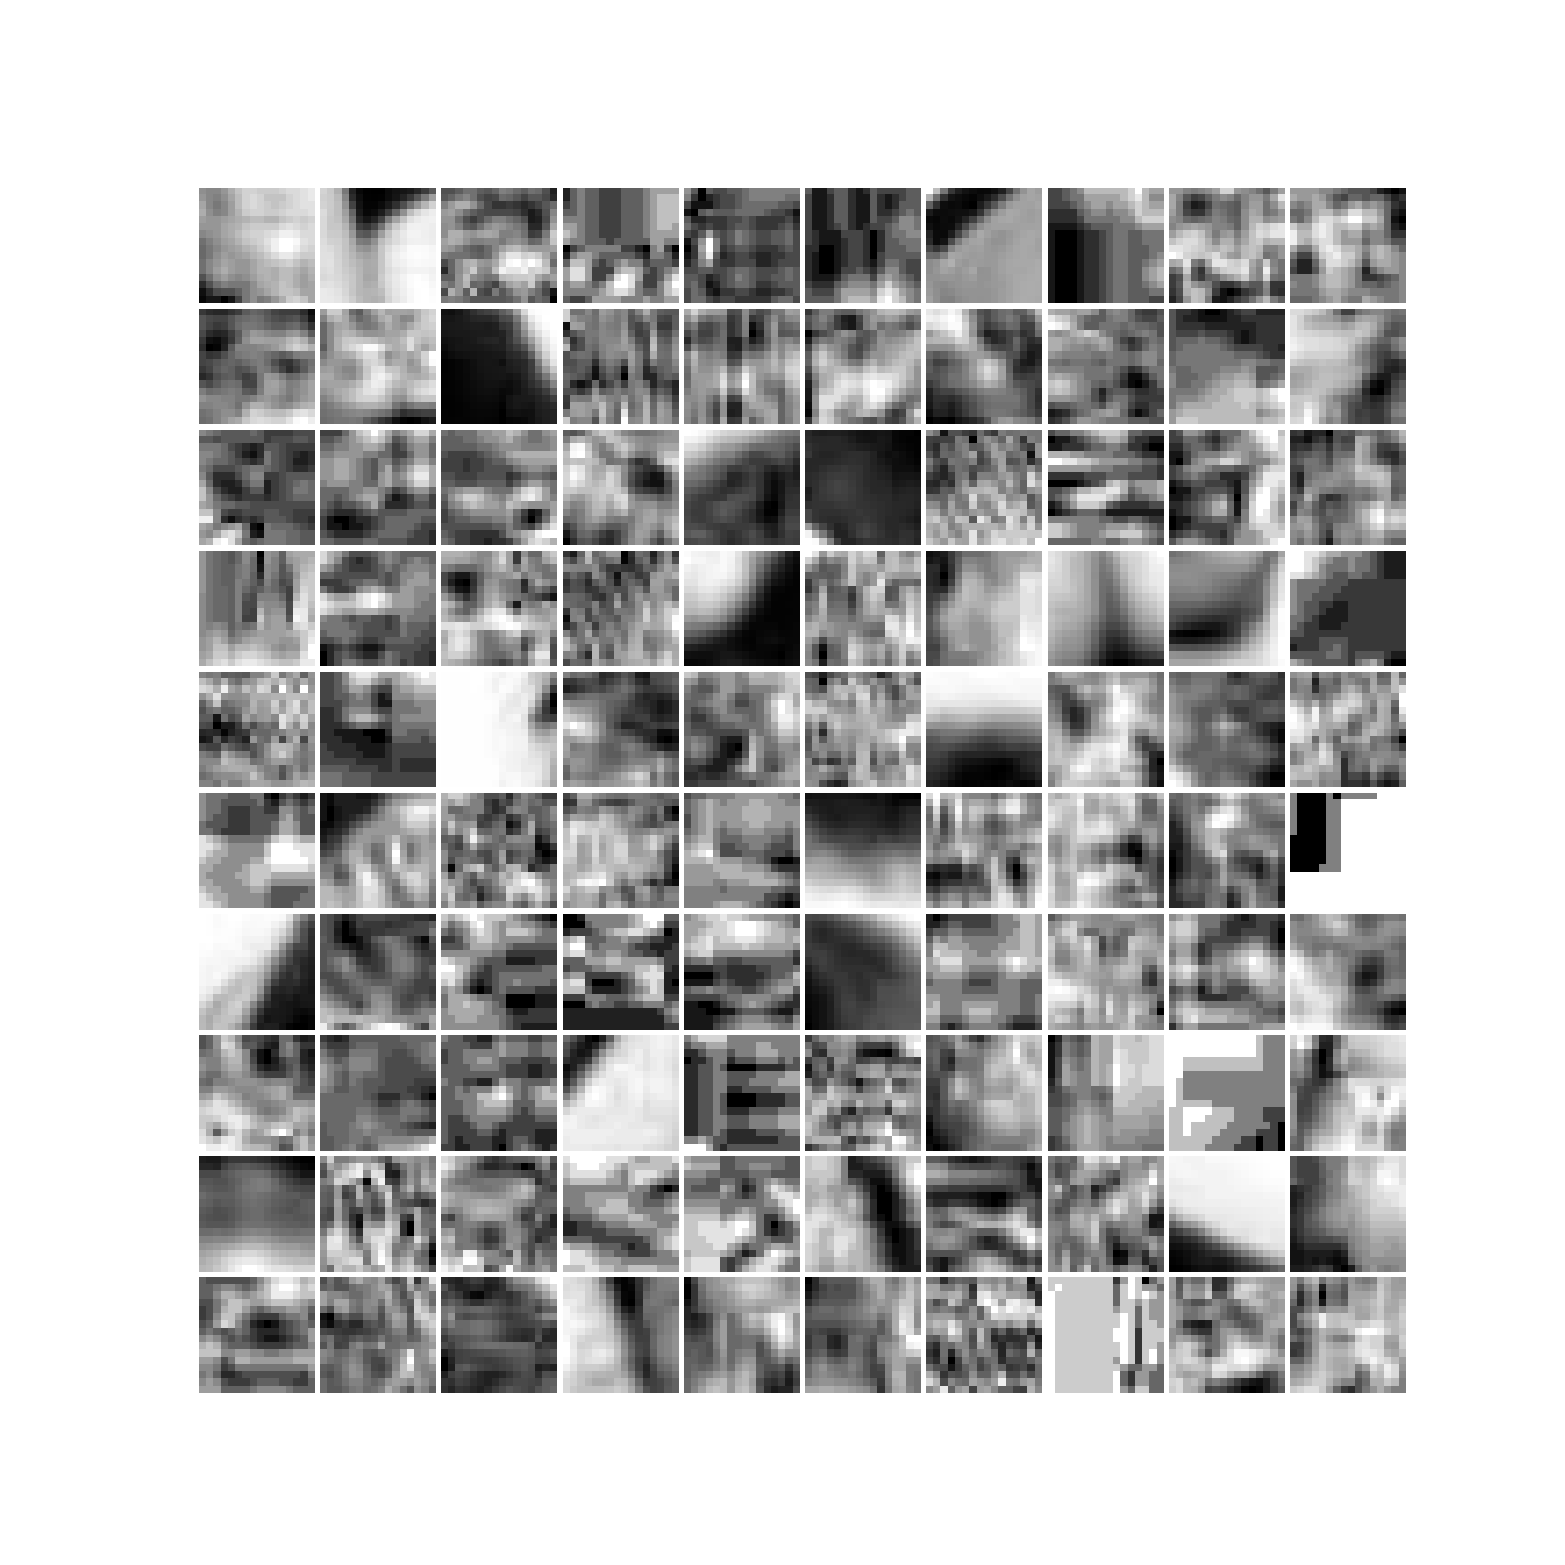

In [305]:
show_images(patches)

# ZCA sphereing

In [289]:
# compute eigendecomposition of data covariance matrix for PCA transformation
def PCA(x,**kwargs):
    # regularization parameter for numerical stability
    lam = 10**(-7)
    if 'lam' in kwargs:
        lam = kwargs['lam']

    # create the correlation matrix
    P = float(x.shape[1])
    Cov = 1/P*np.dot(x,x.T) + lam*np.eye(x.shape[0])

    # use numpy function to compute eigenvalues / vectors of correlation matrix
    d,V = np.linalg.eigh(Cov)
    return d,V

In [290]:
# ZCA-sphereing - use ZCA to normalize input features
def ZCA_sphereing(x,**kwargs):
    # Step 1: mean-center the data
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_centered = x - x_means

    # Step 2: compute pca transform on mean-centered data
    d,V = PCA(x_centered,**kwargs)

    # Step 3: divide off standard deviation of each (transformed) input, 
    # which are equal to the returned eigenvalues in 'd'.  
    stds = (d[:,np.newaxis])**(0.5)
    
    # Step 4: rotate the data back
    normalizer = lambda data: np.dot(V, (np.dot(V.T,data - x_means)/stds))

    # create inverse normalizer
    inverse_normalizer = lambda data: np.dot(V, np.dot(V.T,data)*stds) + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

In [291]:
ZCA, inverse_ZCA = ZCA_sphereing(patches)
Z = ZCA(patches)

# Plot ZCA sphered data

<IPython.core.display.Javascript object>


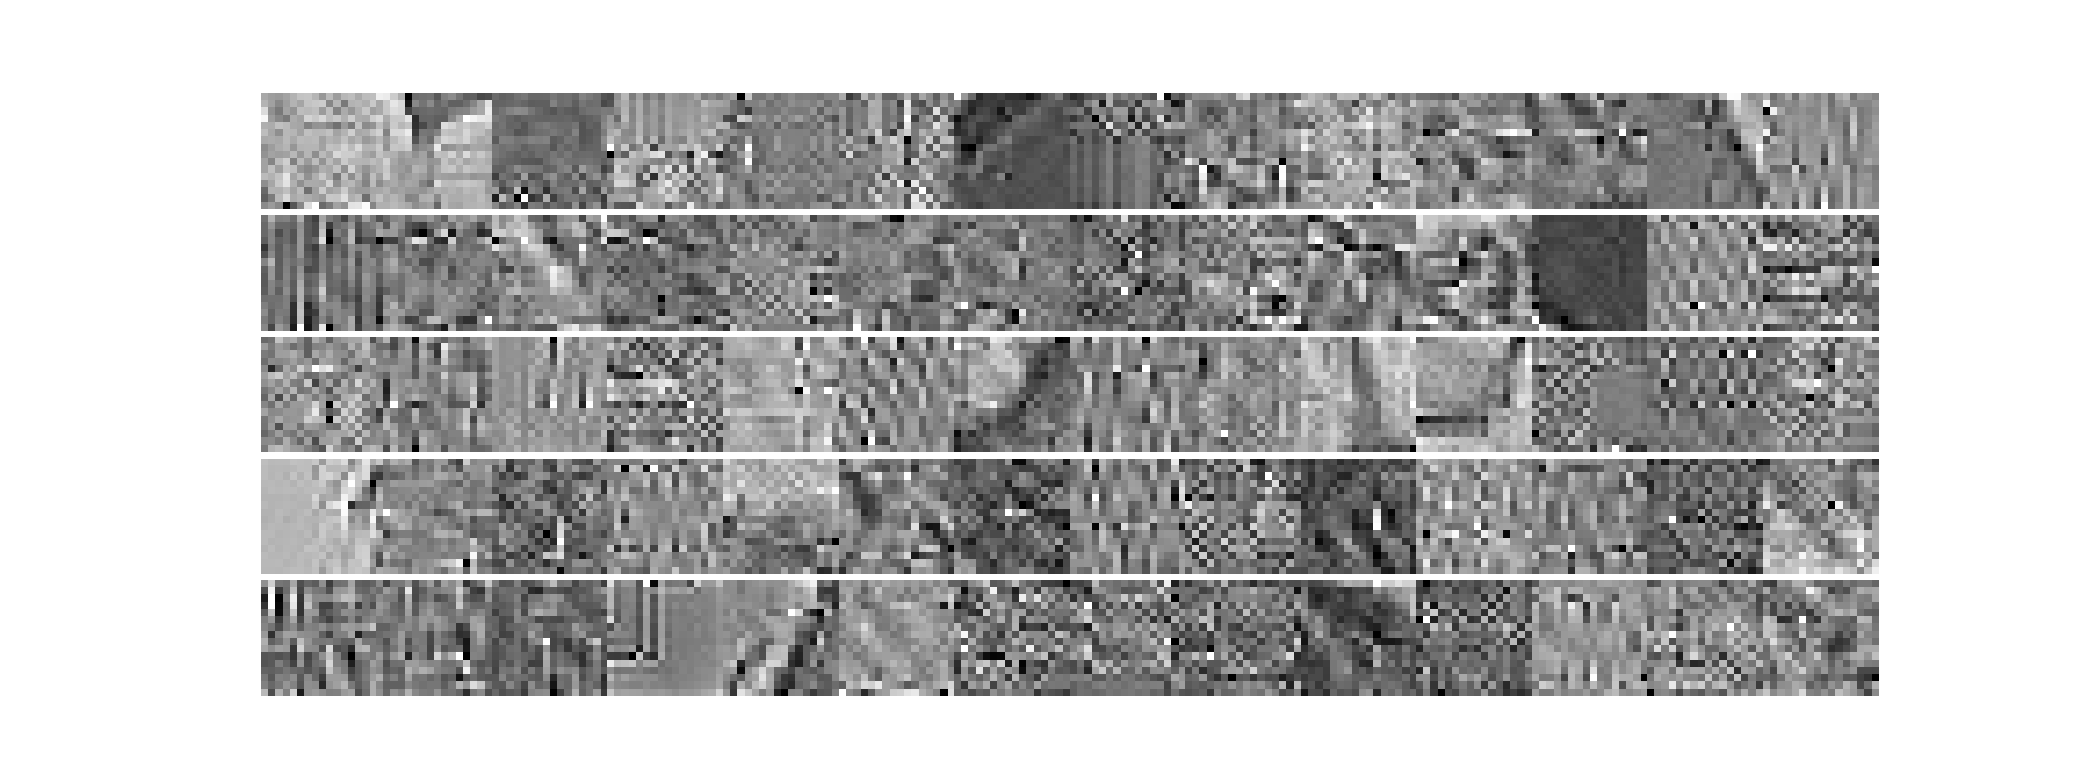

In [292]:
show_images(Z)

# Perform K-means

In [302]:
# perform K-means clustering
num_clusters = 100       # number of clusters
clusterer = KMeans(n_clusters=num_clusters,max_iter = 10000,n_init = 1)

# fit the algorithm to our dataset
clusterer.fit(Z.T)

# cents = clusterer.cluster_centers_ # extract cluster centroids
centroids = clusterer.cluster_centers_.T

# Plot centroids

<IPython.core.display.Javascript object>


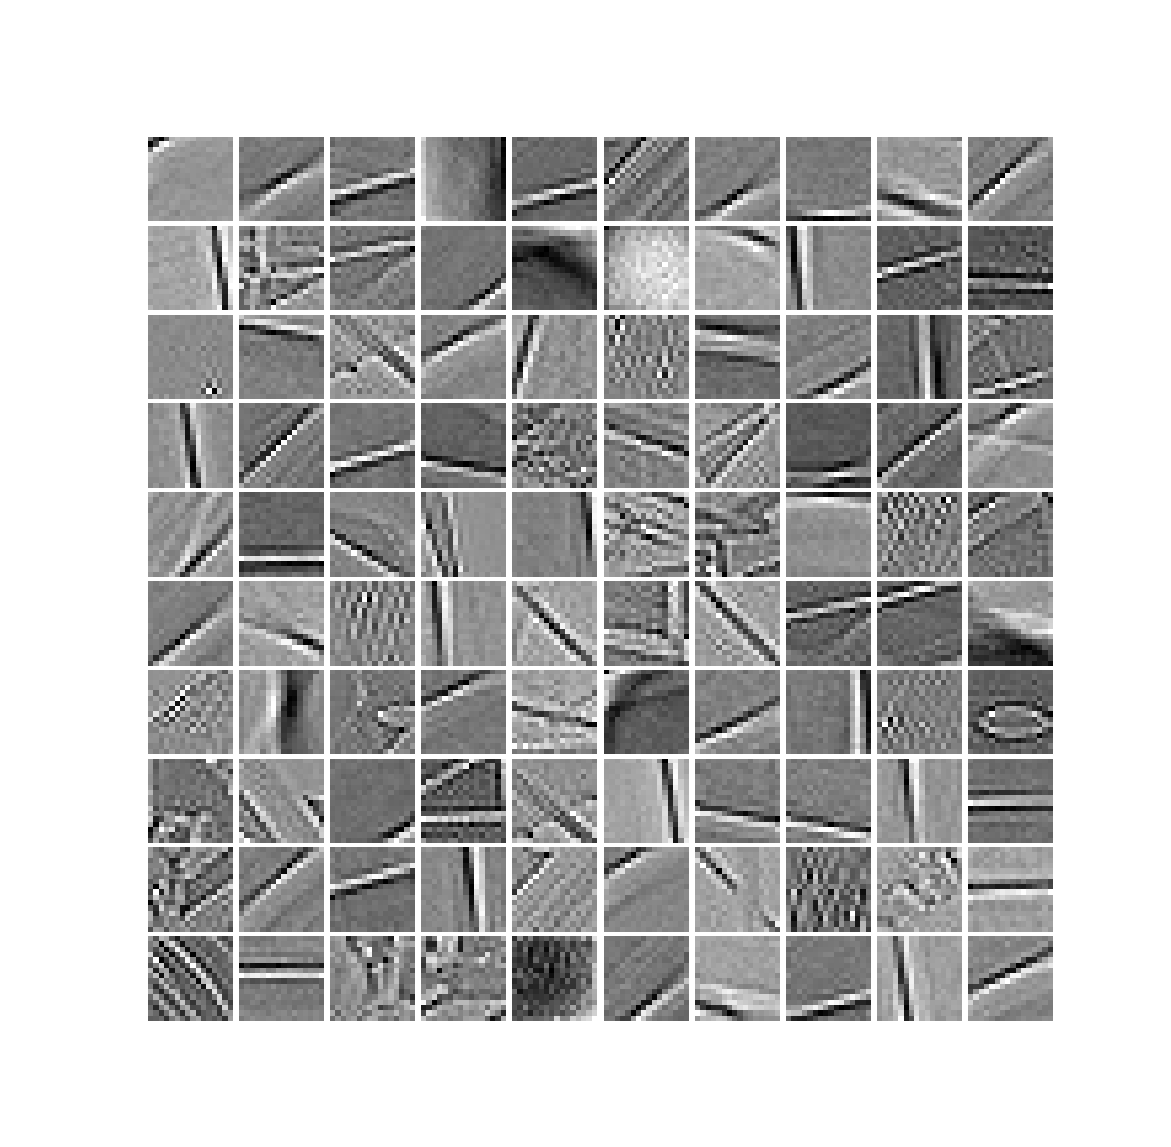

In [311]:
show_images(centroids)

In [295]:
# perform K-means clustering
num_clusters = 200       # number of clusters
clusterer = KMeans(n_clusters=num_clusters,max_iter = 5000,n_init = 1)

# fit the algorithm to our dataset
clusterer.fit(patches.T)

# cents = clusterer.cluster_centers_ # extract cluster centroids
centroids = clusterer.cluster_centers_.T

<IPython.core.display.Javascript object>


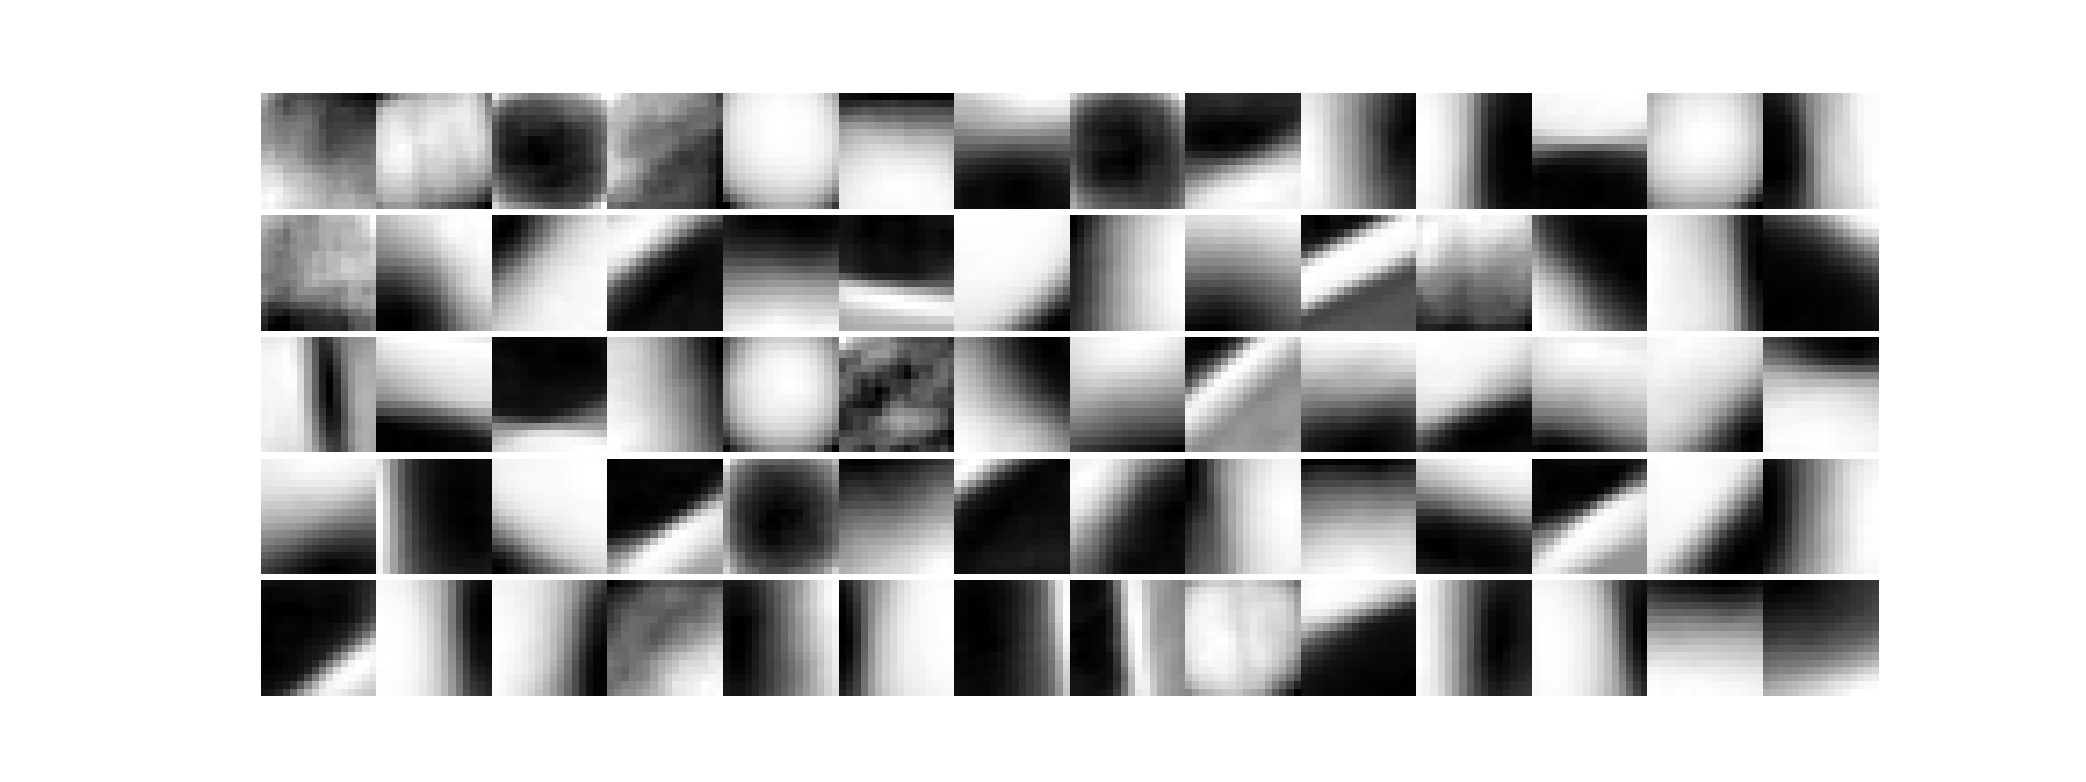

In [296]:
show_images(centroids)